In [29]:
def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names
$
def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values

def readExcelRange(excelfile, sheetname="Sheet1", startrow=1, endrow=1, startcol=1, endcol=1):
    from pandas import read_excel
    values = (read_excel(excelfile, sheetname, header=None)).values;
    return values[startrow - 1:endrow, startcol - 1:endcol]
 
def readExcel(excelfile, **args):
    if args:
        data = readExcelRange(excelfile, **args)
    else:
        data = readExcelSheet1(excelfile)
    if data.shape == (1, 1):
        return data[0, 0]
    elif (data.shape)[0] == 1:
        return data[0]
    else:
        return data
def writeExcelData(x, excelfile, sheetname, startrow, startcol, reshape=None):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    if reshape:
        df = DataFrame(x.reshape(-1, len(x)))
    else:
        df = DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl')
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname, startrow=startrow - 1, startcol=startcol - 1, header=False, index=False)
    writer.save()
    writer.close()
    
    
excelfile = r"/Users/omerorhan/Desktop/UCSC/MachineLearning/Assignments/venv/notebookfiles/Assignment#3/Assignment_3_ Submission_Template.xlsx";
sheets = getSheetNames(excelfile);
sheets

data = readExcel(excelfile)


###Home work

Checking shape of matrix X: (11800, 784)
Checking min/max values: X (0, 255)
Checking unique labels in T: [2, 4]
Checking shape of matrix: T (11800, 1)
Checking min/max values: T  (2, 4)
Checking one training vector by plotting image:


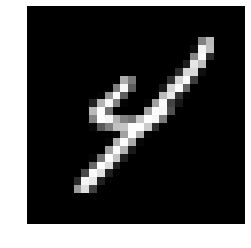

Checking multiple training vectors by plotting images.
Be patient:


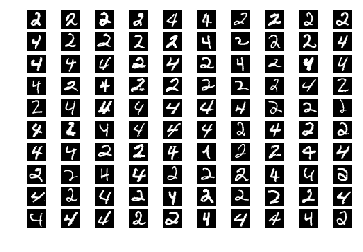

In [30]:
import struct
import numpy as np
from array import array
import matplotlib.pyplot as plt
import numpy.linalg as LA

'''
Import and uncompress handwritten digit data from yann.lecun.com/exdb/mnist (four files). 
If you use Python, refer to the Python code suggested in Read_MNIST-Improved.html to read and parse 
the data
Prepare the data you will use for this assignment by limiting the imported data to two specific digits. 
The exact two digits that you will use for the rest of the assignment is given in a table following these
instructions. The positive and negative class labels have also been identified for you.
Prepare your X matrix and target vector T
'''

firstDigit = 2
secondDigit = 4
def load_mnist(dataset="training", selecteddigits=range(10),
               path='/Users/omerorhan/Desktop/UCSC/MachineLearning/assignment#3'):
    #Check training/testing specification. Must be "training" (default) or "testing"
    if dataset == "training":
        fname_digits = path + '/' + 'train-images-idx3-ubyte'
        fname_labels = path + '/' + 'train-labels-idx1-ubyte'
    elif dataset == "testing":
        fname_digits = path + '/' + 't10k-images-idx3-ubyte'
        fname_labels = path + '/' + 't10k-labels-idx1-ubyte'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    #Import digits data
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", digitsfileobject.read(16))
    digitsdata = array("B", digitsfileobject.read())
    digitsfileobject.close()

    #Import label data
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size = struct.unpack(">II", labelsfileobject.read(8))
    labelsdata = array("B", labelsfileobject.read())
    labelsfileobject.close()

    #Find indices of selected digits
    indices = [k for k in range(size) if labelsdata[k] in selecteddigits]
    N = len(indices)

    #Create empty arrays for X and T
    X = np.zeros((N, rows * cols), dtype=np.uint8)
    T = np.zeros((N, 1), dtype=np.uint8)

    #Fill X from digitsdata
    #Fill T from labelsdata
    for i in range(N):
        X[i] = digitsdata[indices[i] * rows * cols:(indices[i] + 1) * rows * cols]
        T[i] = labelsdata[indices[i]]

    return X, T
def vectortoimg(v, show=True):
    plt.imshow(v.reshape(28, 28), interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

def get_data_for_labels(P, T, N, labelp, labeln):
    Np = len(T[T == labelp])  # Number Positive class
    Nn = len(T[T == labeln])  # Number Negative class

    Pp = np.zeros((Np, 2), dtype=float)
    Pn = np.zeros((Nn, 2), dtype=float)

    p_i = 0
    n_i = 0
    for i in range(N):
        if (T[i] == labelp):
            Pp[p_i][0] = P[i][0]
            Pp[p_i][1] = P[i][1]
            p_i = p_i + 1
        elif (T[i] == labeln):
            Pn[n_i][0] = P[i][0]
            Pn[n_i][1] = P[i][1]
            n_i = n_i + 1

    mup = np.mean(Pp, axis=0)
    mun = np.mean(Pn, axis=0)
    print("mup ", mup)
    print("mup shape", mup.shape)
    print("mun ", mun)
    print("mun shape", mun.shape)

    return Np, Nn, Pp, Pn, mup, mun





X, T = load_mnist(dataset="training", selecteddigits=[firstDigit, secondDigit])

print("Checking shape of matrix X:", X.shape)
print("Checking min/max values: X", (np.amin(X), np.amax(X)))
print("Checking unique labels in T:", list(np.unique(T)))
print("Checking shape of matrix: T", T.shape)
print("Checking min/max values: T ", (np.amin(T), np.amax(T)))

print("Checking one training vector by plotting image:")
vectortoimg(X[-10])

print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure()
nrows = 10
ncols = 10
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row * ncols + col + 1)
        vectortoimg(X[np.random.randint(len(T))], show=False)
plt.show()


Checking shape of mu: (784,)
Checking max of mu: 184.8912711864407
Checking min of mu: 0.0


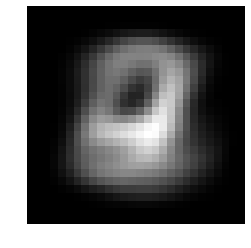

Z shape:  (11800, 784)
Checking max of Z: 254.97050847457626
Checking min of Z: -184.8912711864407


C shape:  (784, 784)
λ type <class 'numpy.ndarray'>
λ shape (2,)
V type <class 'numpy.ndarray'>
V shape:  (2, 784)
dot product of the two eigenvectors -1.1275702593849246e-17


Written mu, v1, v2
Check that the mean of 𝑃 [-2.70969687e-14 -5.81633423e-14]


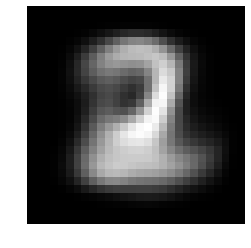

mup  [-604.46616583   42.74194865]
mup shape (2,)
mun  [592.69743887 -41.90977912]
mun shape (2,)


Written Np, Nn


Written mup, mun
cp shape (2, 2)
cn shape (2, 2)


Written cp, cn
Pmin shape (2,)
Pmax shape (2,)


Written p1min, p1max, p2min, p2max


In [31]:
'''
Go through the XZCVP procedure to produce P which is the 2D approximation to X. Produce a 2D scatterplot 
showing the two classes. The mean vector (mu) and two eigenvectors (v1, v2) calculated in completing this
 step must also be entered into the Excel template attached.
'''

mu = np.mean(X, axis=0)
print("Checking shape of mu:", mu.shape)
print("Checking max of mu:", np.amax(mu))
print("Checking min of mu:", np.amin(mu))
vectortoimg(mu)


Z = X - mu
print("Z shape: ", Z.shape)
print("Checking max of Z:", np.amax(Z))
print("Checking min of Z:", np.amin(Z))
C = np.cov(Z, rowvar=False)
print("C shape: ", C.shape)

[λorig, Vorig] = LA.eigh(C)

λF = np.flipud(λorig)
VTF = np.flipud(Vorig.T)

λ = λF[:2]
V = VTF[:2]
print("λ type", type(λ))
print("λ shape", λ.shape)
print("V type", type(V))
print("V shape: ", V.shape)

v1 = V[0, :]
v2 = V[1, :]

print("dot product of the two eigenvectors", np.dot(v1,v2))

writeExcelData(["Omer Orhan"], excelfile, 'Results', 1, 1)
writeExcelData([mu], excelfile, 'Results', 2, 2)
writeExcelData([v1], excelfile, 'Results', 3, 2)
writeExcelData([v2], excelfile, 'Results', 4, 2)

print("Written mu, v1, v2")

# Principal components

#https://www.youtube.com/watch?v=_UVHneBUBW0  watch this video
P = np.dot(Z, V.T) #Dot product of two arrays. Specifically, the most important 2 >> look at V
print('Check that the mean of 𝑃 '+ str(np.mean(P,axis=0)))
'''
Dot product of two arrays. Specifically,
If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.
'''
xrec = np.dot(P, V)+mu
vectortoimg(xrec[50])



labeln = firstDigit
labelp = secondDigit
N = np.alen(T)  #Return the length of the first dimension of the input array.

Np, Nn, Pp, Pn, mup, mun = get_data_for_labels(P, T, N, labelp, labeln)

writeExcelData([Np, Nn], excelfile, 'Results', 6, 2)
print("Written Np, Nn")

writeExcelData([mup, mun], excelfile, 'Results', 9, 2)
print("Written mup, mun")

cp = np.cov(Pp, rowvar=False)
cn = np.cov(Pn, rowvar=False)
print("cp shape", cp.shape)
print("cn shape", cn.shape)
writeExcelData(cp, excelfile, 'Results', 12, 2)
writeExcelData(cn, excelfile, 'Results', 14, 2)
print("Written cp, cn")

Pmin = np.amin(P, axis=0)
Pmax = np.amax(P, axis=0)

print("Pmin shape", Pmin.shape)
print("Pmax shape", Pmax.shape)

p1min = Pmin[0]
p1max = Pmax[0]
p2min = Pmin[1]
p2max = Pmax[1]

writeExcelData([[p1min, p1max]], excelfile, 'Results', 17, 2)
writeExcelData([[p2min, p2max]], excelfile, 'Results', 18, 2)
print("Written p1min, p1max, p2min, p2max")



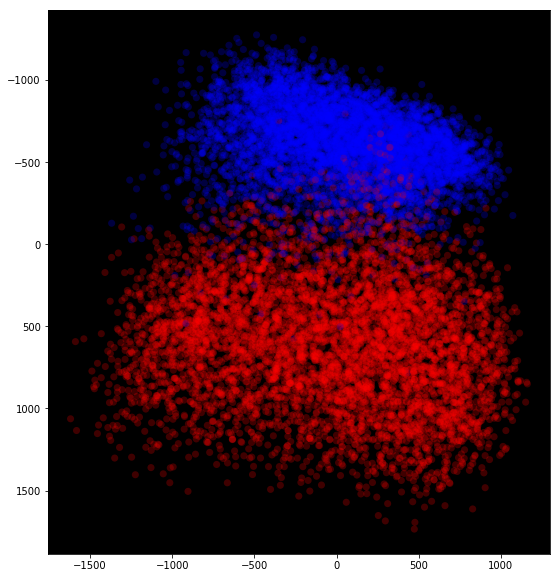

In [32]:
def draw_2D_point_cloud(P, T, labelp, labeln):
    # For best effect, points should not be drawn in sequence but in random order
    np.random.seed(0)
    randomorder = np.random.permutation(np.arange(len(T)))

    # Set colors
    
    
    cols = np.zeros((len(T), 4))  # Initialize matrix to hold colors
    #print(cols)
    
    cols[np.where(T == labeln)[0]] = [1, 0, 0, 0.25]   # Negative points are red (with opacity 0.25)
    
    cols[np.where(T == labelp)[0]] = [0, 0, 1, 0.25]  # Positive points are blue (with opacity 0.25)
    
    # Draw scatter plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, facecolor='black')
    ax.scatter(P[randomorder, 1], P[randomorder, 0], s=50, linewidths=0, facecolors=cols[randomorder, :], marker="o")
    ax.set_aspect('equal')

    plt.gca().invert_yaxis()
    plt.show()
    
draw_2D_point_cloud(P, T, labelp, labeln)



In [33]:

def Build2DHistogramClassifier(P, T, B, Pmin, Pmax, labeln, labelp):
    HN = np.zeros([B, B]).astype('int32')
    HP = np.zeros([B, B]).astype('int32')
    print("Build Histo: P shape", P.shape)
    print("pmin shape", Pmin.shape)
    print("pmax shape", Pmax.shape)
    RC = (np.round(((B - 1) * (P - Pmin) / (Pmax - Pmin)))).astype('int32')
    for i, rc in enumerate(RC):
        if T[i] == labeln:
            HN[rc[0], rc[1]] += 1
        elif T[i] == labelp:
            HP[rc[0], rc[1]] += 1
    return [HN, HP]

def Apply2DHistogramClassifier(queries, HN, HP, Pmin, Pmax, labeln, labelp):
    B = np.alen(HN)
    print("Hist: queries shape", queries.shape)
    np.clip(queries, Pmin, Pmax, out=queries)
    RC = (np.round(((B - 1) * (queries - Pmin) / (Pmax - Pmin)))).astype('int32')
    countN = HN[RC[:, 0], RC[:, 1]]
    countP = HP[RC[:, 0], RC[:, 1]]
    resultlabel = np.full(np.alen(RC), "Indeterminate", dtype=object)
    resultprob = np.full(np.alen(RC), np.nan, dtype=object)
    indicesN = countN > countP
    indicesP = countP > countN
    resultlabel[indicesN] = labeln
    resultlabel[indicesP] = labelp
    probN = countN / (countN + countP)
    probP = countP / (countN + countP)
    resultprob[indicesN] = probN[indicesN]
    resultprob[indicesP] = probP[indicesP]
    return resultlabel, resultprob
def pdf(x, mu, sigma):
    d = np.alen(mu)
    dfact1 = (2 * np.pi) ** d
    dfact2 = np.linalg.det(sigma)
    fact = 1 / np.sqrt(dfact1 * dfact2)
    xc = x - mu
    isigma = np.linalg.inv(sigma)
    return fact * np.exp(-0.5 * np.einsum('ij,jk,ik->i', xc, isigma, xc))

def Apply2DBayesianClassifier(queries, muN, muP, sigmaN, sigmaP, NN, NP, labeln, labelp):
    A = 1
    countN = NN * A * pdf(queries, muN, sigmaN)
    countP = NP * A * pdf(queries, muP, sigmaP)
    resultlabel = np.full(np.alen(queries), "Indeterminate", dtype=object)
    resultprob = np.full(np.alen(queries), np.nan, dtype=object)
    indicesN = countN > countP
    indicesP = countP > countN
    resultlabel[indicesN] = labeln
    resultlabel[indicesP] = labelp
    probN = countN / (countN + countP)
    probP = countP / (countN + countP)
    resultprob[indicesN] = probN[indicesN]
    resultprob[indicesP] = probP[indicesP]
    return resultlabel, resultprob
def Build2DBayesianClassifier(P, T, labeln, labelp):
    muN = np.mean(P[np.where(T == labeln)[0]], axis=0)
    muP = np.mean(P[np.where(T == labelp)[0]], axis=0)
    sigmaN = np.cov(P[np.where(T == labeln)[0]], rowvar=False)
    sigmaP = np.cov(P[np.where(T == labelp)[0]], rowvar=False)
    NN = list((T == labeln)).count(True)
    NP = list((T == labelp)).count(True)
    return [muN, muP, sigmaN, sigmaP, NN, NP]


B = 32
[Hn, Hp] = Build2DHistogramClassifier(P, T, B, Pmin, Pmax, labeln, labelp)
print("Hn shape", Hn.shape)
print("Hp shape", Hp.shape)
[Hlabels, Hprobs] = Apply2DHistogramClassifier(P, Hn, Hp, Pmin, Pmax, labeln, labelp)


Build Histo: P shape (11800, 2)
pmin shape (2,)
pmax shape (2,)
Hn shape (32, 32)
Hp shape (32, 32)
Hist: queries shape (11800, 2)


In [34]:


def accuracy(truth, result):
    '''
    Computes accuracy
    :param truth: array containing ground class labels
    :param result: array containing classification result class labels
    :return:
    '''
    print("truth shape", truth.shape)
    print("result shape", result.shape)
    result = result.reshape((-1, 1)) 
    count_true = (list((truth == result)).count(True))
    return count_true / np.alen(truth)



print("Hlabels shape, Hprobs shape", Hlabels.shape, Hprobs.shape)
accuracyH = accuracy(T, Hlabels)
print(accuracyH)

Hlabels shape, Hprobs shape (11800,) (11800,)
truth shape (11800, 1)
result shape (11800,)
0.9675423728813559


In [35]:
[muN, muP, sigmaN, sigmaP, N_N, N_P] = Build2DBayesianClassifier(P, T, labeln, labelp)
[Blabels, Bprobs] = Apply2DBayesianClassifier(P, muN, muP, sigmaN, sigmaP, N_N, N_P, labeln, labelp)
print("Blabels shape, Bprobs shape", Blabels.shape, Bprobs.shape)
accuracyB = accuracy(T, Blabels)
print("Accuracy Training:")
print("\tHistogram accuracy %f" % (accuracyH))
print("\tBayesian accuracy %f" % (accuracyB))

Blabels shape, Bprobs shape (11800,) (11800,)
truth shape (11800, 1)
result shape (11800,)
Accuracy Training:
	Histogram accuracy 0.967542
	Bayesian accuracy 0.966271


In [36]:
def test_mnist_data(X, T):
    print("Checking shape of matrix:", X.shape)
    print("Checking min/max values:", (np.amin(X), np.amax(X)))
    print("Checking unique labels in T:", list(np.unique(T)))
    print("Checking # of data points in X", np.alen(X))
    print("Checking # of data points in T", np.alen(T))


writeExcelData(Hp, excelfile, 'Results', 20, 2)
writeExcelData(Hn, excelfile, 'Results', 53, 2)
print("Written Hp, Hn")

Xtest, Ttest = load_mnist(dataset="testing", selecteddigits=[firstDigit, secondDigit])
test_mnist_data(Xtest, Ttest)

for i in range(10):
    print ("Ttest[%d] = %d" % (i, Ttest[i]))
#        print("Xtest[%d]" % (i))
#        print(Xtest[i])

pindex = 0
nindex = 1

xp = Xtest[pindex]
print ("xp shape", xp.shape)
print("mu shape", mu.shape)
writeExcelData([xp], excelfile, 'Results', 88, 2)

#general mean value! pay attendion
zp = xp - mu
print("zp shape", zp.shape)
writeExcelData([zp], excelfile, 'Results', 89, 2)
print("V shape", V.shape)
print("V.T shape", V.T.shape)
pp = np.dot(zp, V.T)
print("pp shape", pp.shape)
writeExcelData([pp], excelfile, 'Results', 90, 2)
Ztest = Xtest - mu
print("Ztest.shape", Ztest.shape)
Ptest = np.dot(Ztest, V.T)
print("Ptest shape", Ptest.shape)

Rtest = np.dot(Ptest, V)
print("Rtest shape", Rtest.shape)
Xrectest = Rtest + mu
print("Xrectest shape", Xrectest.shape)

rp = Rtest[pindex]
xrecp = Xrectest[pindex]
writeExcelData([rp], excelfile, 'Results', 91, 2)
writeExcelData([xrecp], excelfile, 'Results', 92, 2)

xn = Xtest[nindex]
print("xn shape", xn.shape)
writeExcelData([xn], excelfile, 'Results', 94, 2)
zn = xn - mu
print("zn shape", zn.shape)
writeExcelData([zn], excelfile, 'Results', 95, 2)
pn = np.dot(zn, V.T)
print("pn shape", pn.shape)
writeExcelData([pn], excelfile, 'Results', 96, 2)

rn = Rtest[nindex]
xrecn = Xrectest[nindex]
writeExcelData([rn], excelfile, 'Results', 97, 2)
writeExcelData([xrecn], excelfile, 'Results', 98, 2)

[Hlabelstest, Hprobstest] = Apply2DHistogramClassifier(Ptest, Hn, Hp, Pmin, Pmax, labeln, labelp)
print("Hlabelstest shape, Hprobstest shape", Hlabelstest.shape, Hprobstest.shape)
accuracyHtest = accuracy(Ttest, Hlabelstest)

[Blabelstest, Bprobstest] = Apply2DBayesianClassifier(Ptest, muN, muP, sigmaN, sigmaP, N_N, N_P, labeln, labelp)
print("Blabelstest shape, Bprobstest shape", Blabelstest.shape, Bprobstest.shape)
accuracyBtest = accuracy(Ttest, Blabelstest)
print("Accuracy Testing Set:")
print("\tHistogram accuracy %f" % (accuracyHtest))
print("\tBayesian accuracy %f" % (accuracyBtest))

# pindex results
Plabel_actual = labelp
Plabel_histo = Hlabelstest[pindex]
Pprob_histo = Hprobstest[pindex]
Plabel_bayes = Blabelstest[pindex]
Pprob_bayes = Bprobstest[pindex]

writeExcelData([Plabel_actual], excelfile, 'Results', 102, 2)
writeExcelData([Plabel_histo], excelfile, 'Results', 103, 2)
writeExcelData([Pprob_histo], excelfile, 'Results', 103, 3)
writeExcelData([Plabel_bayes], excelfile, 'Results', 104, 2)
writeExcelData([Pprob_bayes], excelfile, 'Results', 104, 3)
print("Written digit truthp, resultlabelHp, resultprobHp, resultlabelBp, resultprobBp")

# nindex results
Nlabel_actual = labeln
Nlabel_histo = Hlabelstest[nindex]
Nprob_histo = Hprobstest[nindex]
Nlabel_bayes = Blabelstest[nindex]
Nprob_bayes = Bprobstest[nindex]

writeExcelData([Nlabel_actual], excelfile, 'Results', 106, 2)
writeExcelData([Nlabel_histo], excelfile, 'Results', 107, 2)
writeExcelData([Nprob_histo], excelfile, 'Results', 107, 3)
writeExcelData([Nlabel_bayes], excelfile, 'Results', 108, 2)
writeExcelData([Nprob_bayes], excelfile, 'Results', 108, 3)
print("Written truthn, resultlabelHn, resultprobHn, resultlabelBn, resultprobBn")

writeExcelData([accuracyHtest, accuracyBtest], excelfile, 'Results', 111, 2)
print("Written accuracyHtest, accuracyBtest")


Written Hp, Hn
Checking shape of matrix: (2014, 784)
Checking min/max values: (0, 255)
Checking unique labels in T: [2, 4]
Checking # of data points in X 2014
Checking # of data points in T 2014
Ttest[0] = 2
Ttest[1] = 4
Ttest[2] = 4
Ttest[3] = 4
Ttest[4] = 4
Ttest[5] = 4
Ttest[6] = 4
Ttest[7] = 2
Ttest[8] = 2
Ttest[9] = 4
xp shape (784,)
mu shape (784,)


zp shape (784,)


V shape (2, 784)
V.T shape (784, 2)
pp shape (2,)


Ztest.shape (2014, 784)
Ptest shape (2014, 2)
Rtest shape (2014, 784)
Xrectest shape (2014, 784)


xn shape (784,)


zn shape (784,)


pn shape (2,)


Hist: queries shape (2014, 2)
Hlabelstest shape, Hprobstest shape (2014,) (2014,)
truth shape (2014, 1)
result shape (2014,)
Blabelstest shape, Bprobstest shape (2014,) (2014,)
truth shape (2014, 1)
result shape (2014,)
Accuracy Testing Set:
	Histogram accuracy 0.965740
	Bayesian accuracy 0.968719


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


Written digit truthp, resultlabelHp, resultprobHp, resultlabelBp, resultprobBp


Written truthn, resultlabelHn, resultprobHn, resultlabelBn, resultprobBn


Written accuracyHtest, accuracyBtest
